In [ ]:
import tensorflow as tf

from keras import optimizers
from keras.utils import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
import cv2
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
callback=EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
patience = 10,
verbose=1,
mode="auto",
baseline=None,
restore_best_weights= True
)

We split the data for test and train. 75 per for training and 25 per for testing.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_path = '/content/drive/MyDrive/Colab Notebooks/Fleas/train'
test_path = '/content/drive/MyDrive/Colab Notebooks/Fleas/test'


In [ ]:
image_shape = (400,450,3)
N_CLASSES = 2
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(dtype='float32', rescale= 1./255.)
train_generator = train_datagen.flow_from_directory(train_path,
                                                    batch_size = BATCH_SIZE,
                                                   target_size = (400,450),
                                                    class_mode = 'binary')

test_datagen = ImageDataGenerator(dtype='float32', rescale = 1.0/255.0)
test_generator = test_datagen.flow_from_directory(test_path,
                                                     batch_size = BATCH_SIZE,
                                                   target_size = (400,450),
                                                   class_mode = 'binary')

print(train_generator.image_shape)
print(train_generator)


Found 335 images belonging to 2 classes.
Found 112 images belonging to 2 classes.
(400, 450, 3)


In [ ]:
train_generator.image_shape

(400, 450, 3)

In [ ]:
train_generator.num_classes

2

In [ ]:
train_generator.class_indices

{'Cat Flea': 0, 'Dog Flea': 1}

['Cat Flea', 'Dog Flea']


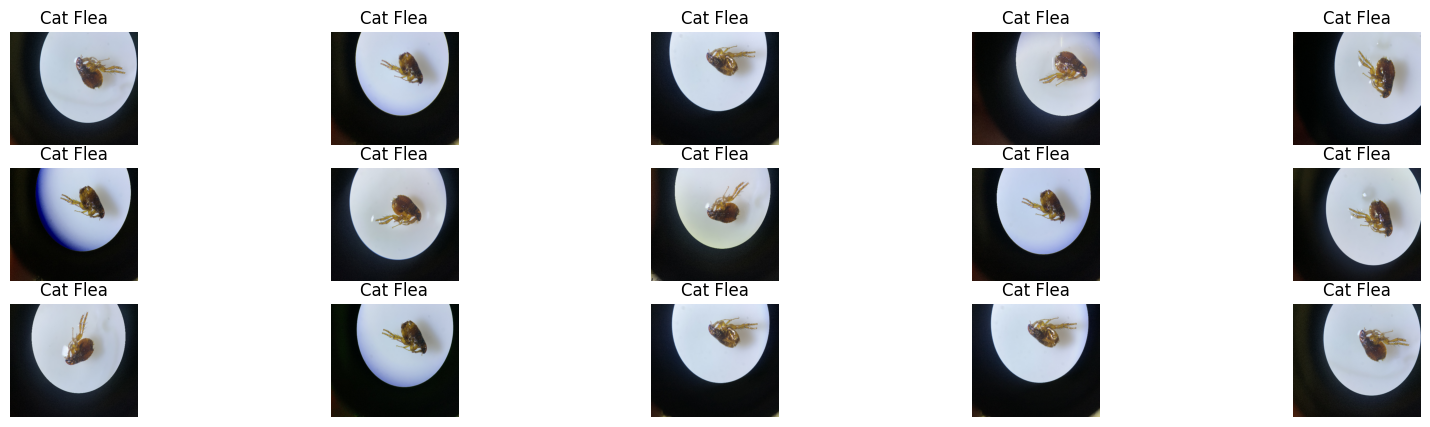

In [ ]:
class_names = list(test_generator.class_indices.keys())
print(class_names)

fig = plt.figure(figsize=(20,5))

image_batch,label_batch = test_generator[1]

for i in range(15):
    ax = fig.add_subplot(3,5,i+1,xticks = [], yticks = [])
    ax.imshow(image_batch[i])
    plt.axis('off')
    plt.title(class_names[np.argmax(label_batch[i])])

# ***Neural Network Layers (3 CNN layers and 2 ANN layers)***

In [ ]:
# Classifier.fit_generator(training_set,samples_per_epoch=8000,nb_epoch=25,validation_data=test_set,nb_val_samples=2000)

model = Sequential()
model.add(Conv2D(input_shape = (400,450, 3), kernel_size=(3, 3), strides=(2, 2), filters=32))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))

model.add(Conv2D(kernel_size=(3, 3), strides=(2, 2), filters=64))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
model.add(Conv2D(kernel_size=(3, 3), strides=(2, 2), filters=128))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation = 'sigmoid'))


In [ ]:

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.build(input_shape=(400,450, 3))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 199, 224, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 198, 223, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 98, 111, 64)       18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 97, 110, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 48, 54, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 47, 53, 128)     

In [ ]:
history = model.fit(
     train_generator,
            epochs= 25,
            verbose=1,
            validation_data=test_generator,
            callbacks=callback
            )

Epoch 1/25
11/11 [==============================] - 85s 8s/step - loss: 5.3941 - accuracy: 0.6209 - val_loss: 2.1379 - val_accuracy: 0.5000
Epoch 2/25
11/11 [==============================] - 78s 7s/step - loss: 1.0050 - accuracy: 0.7194 - val_loss: 0.9259 - val_accuracy: 0.5000
Epoch 3/25
11/11 [==============================] - 77s 7s/step - loss: 0.7639 - accuracy: 0.7881 - val_loss: 1.0235 - val_accuracy: 0.6250
Epoch 4/25
11/11 [==============================] - 76s 7s/step - loss: 0.4151 - accuracy: 0.8149 - val_loss: 0.6085 - val_accuracy: 0.6875
Epoch 5/25
11/11 [==============================] - 78s 7s/step - loss: 0.2638 - accuracy: 0.8896 - val_loss: 0.5681 - val_accuracy: 0.7143
Epoch 6/25
11/11 [==============================] - 76s 7s/step - loss: 0.1979 - accuracy: 0.9045 - val_loss: 0.4947 - val_accuracy: 0.7500
Epoch 7/25
11/11 [==============================] - 76s 7s/step - loss: 0.1057 - accuracy: 0.9612 - val_loss: 0.3559 - val_accuracy: 0.8036
Epoch 8/25
11/11 [==

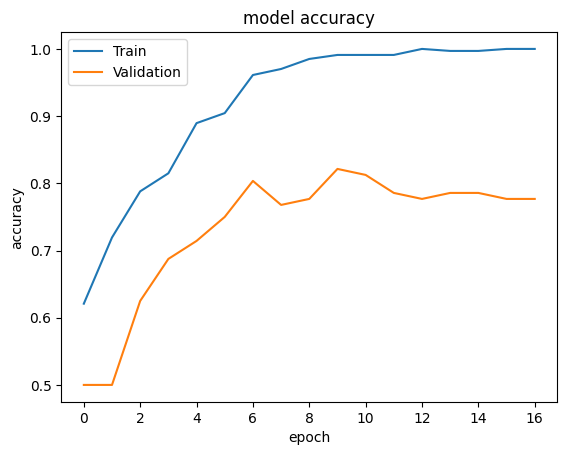

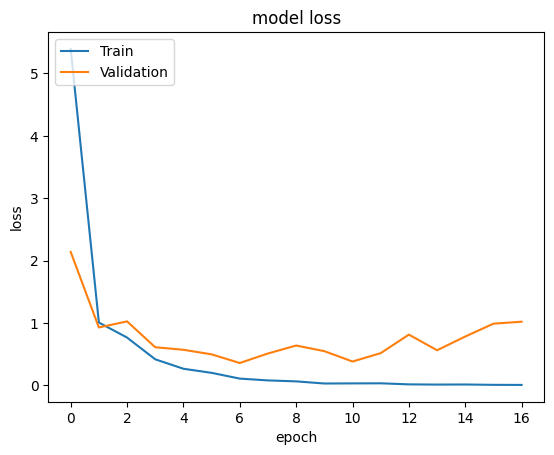

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# **Prediction according to above trained model**

In [ ]:
import numpy as np
from keras.preprocessing import image
from keras.utils import load_img, img_to_array
test_image = load_img('/content/drive/MyDrive/Colab Notebooks/Fleas/cat_flea.jpg', target_size=(400,450))

test_image = np.array(test_image)
test_image = test_image/ 255.0  # normalize the image
test_image = test_image.reshape(1, 400, 450, 3) # reshape for prediction
#plt.imshow(test_image)

pred = model.predict(test_image)
if pred[0] > 0.5:
    label = 'Dog Flea'
else:
    label = 'Cat Flea'
print(label)

1/1 [==============================] - 9s 9s/step
Cat Flea


In [ ]:
import numpy as np
from keras.preprocessing import image
from keras.utils import load_img, img_to_array
test_image = load_img('/content/drive/MyDrive/Colab Notebooks/Fleas/test/Cat Flea/IMG_5362.JPG', target_size=(400,450))
# above loaded file is of cat flea from test data
test_image = np.array(test_image)
test_image = test_image/ 255.0  # normalize the image
test_image = test_image.reshape(1, 400, 450, 3) # reshape for prediction
pred = model.predict(test_image)

if pred[0] > 0.5:
    label = 'Dog Flea'
else:
    label = 'Cat Flea'
print(label)


1/1 [==============================] - 0s 380ms/step
Cat Flea


In [ ]:
import numpy as np
from keras.preprocessing import image
from keras.utils import load_img, img_to_array
test_image = load_img('/content/drive/MyDrive/Colab Notebooks/Fleas/test/Dog Flea/IMG_4736.JPG', target_size=(400,450))
# above loaded file is of Dog flea from the Test folder
test_image = np.array(test_image)
test_image = test_image/ 255.0  # normalize the image
test_image = test_image.reshape(1, 400, 450, 3) # reshape for prediction
pred = model.predict(test_image)

if pred[0] > 0.5:
    label = 'Dog Flea'
else:
    label = 'Cat Flea'
print(label)

1/1 [==============================] - 0s 20ms/step
Dog Flea


#**Saving Model**

In [ ]:
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/Colab Notebooks/Fleas/model_1.hdf5')
import os
os.chdir(r'/content/drive/MyDrive/Colab Notebooks/Fleas')
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Colab Notebooks/Fleas/model_2.hdf5')